# Library needed in this project

In [ ]:
#import library
import pandas as pd
import string
import matplotlib.pyplot as plt
import re
import numpy as np

# Load Dataset

In [ ]:
# Specify the path to CSV file
csv_file_path = 'D:Desktop/cyberbullying_tweets.csv'

In [ ]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)
df.head()

# Extract information from dataset

In [ ]:
#get info about the dataset
df.info()

print('\n')
print('Total unique value in column \'cyberbullying_type\': ')
print(df['cyberbullying_type'].value_counts())

print('\n')
null_count = df['tweet_text'].isnull().sum()
print(f'Total number of null data in column \'tweet_text\': {null_count}')

In [ ]:
# visualize dataset
plt.figure(figsize=(12, 6))
count = df['cyberbullying_type'].value_counts()
count.plot(kind='bar',color=['blue', 'red', 'green', 'purple', 'orange', 'yellow'])
plt.title('Distribution of Cyberbullying Classes in Twitter Dataset')
plt.xlabel('Attacks type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# check and display the total number of occurrences of '0' in 'target'
count_religion = df['cyberbullying_type'].value_counts().get('religion', 0)
print(f'Total number of text that label as religion attack = {count_religion}')

count_age = df['cyberbullying_type'].value_counts().get('age', 0)
print(f'Total number of text that label as age attack = {count_age}')

count_gender = df['cyberbullying_type'].value_counts().get('gender', 0)
print(f'Total number of text that label as gender attack = {count_gender}')

count_ethnicity = df['cyberbullying_type'].value_counts().get('ethnicity', 0)
print(f'Total number of text that label as ethnicity attack = {count_ethnicity}')

count_normal = df['cyberbullying_type'].value_counts().get('not_cyberbullying', 0)
print(f'Total number of text that label as not cyberbullying = {count_normal}')

count_other = df['cyberbullying_type'].value_counts().get('other_cyberbullying', 0)
print(f'Total number of text that label as other attack = {count_other}')

In [ ]:
# Group 6 classes to 2 class
def reformat_type(text):
    if text == "not_cyberbullying":
        return 0
    else:
        return 1

In [ ]:
df['hate_speech'] = df['cyberbullying_type'].apply(reformat_type)

# visualize dataset
plt.figure(figsize=(12, 6))
count = df['hate_speech'].value_counts()
count.plot(kind='bar',color=['blue', 'red'])
plt.title('Distribution of Hate Speech Classes in Twitter Dataset')
plt.xlabel('Present of Hate Speech')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

count_nonhate = df['hate_speech'].value_counts().get(0, 0)
print(f'Total number of text that label as non hate = {count_nonhate}')

count_hate = df['hate_speech'].value_counts().get(1, 0)
print(f'Total number of text that label as hate = {count_hate}')

print('Total unique value in column \'offensive\': ')
print(df['hate_speech'].value_counts())

# Lowering text

In [ ]:
# lower text to lowercase
df['clean_text'] = df['tweet_text'].apply(lambda x: x.lower())
df.head()

# URLs removal

In [ ]:
# define function to remove URLs from text using regular expression
def url_removal(text):
    url_pattern = re.compile(r'http[s]?://\S+|www\.\S+|bit.ly/\S+')
    return url_pattern.sub(r'',text)

In [ ]:
# apply function to remove URL and show before and after
print("\033[1mSample data before URL removal\033[0m")
print(df[['clean_text','hate_speech']].iloc[10:15])
print("\n")
df['clean_text'] = df['clean_text'].apply(url_removal)
print("\033[1mSample data after URL removal\033[0m")
print(df[['clean_text','hate_speech']].iloc[10:15])
print("\n")

# User mentions and HTML entity removal

In [ ]:
# define function to remove user mention and html entity using regular expression
def mention_html_removal(text):
    mention_html_pattern = re.compile(r'@\w+|&\w+;')
    cleaned_text = mention_html_pattern.sub(r'',text)
    return cleaned_text

In [ ]:
# apply function to remove user mention and html entity and show before and after
print("\033[1mSample data before user mention and html entity removal\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")
df['clean_text'] = df['clean_text'].apply(mention_html_removal)
print("\033[1mSample data after user mention and html entity removal\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")

# Emojis removal

In [ ]:
# define function to remove emojis in text using regular expression
def emojis_removal(text):
     emoji_pattern = re.compile("["
                               "\U0001F600-\U0001F64F"  # Emoticons
                               "\U0001F300-\U0001F5FF"  # Miscellaneous Symbols and Pictographs
                               "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               "\U0001F700-\U0001F77F"  # Alchemical Symbols
                               "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               "\U0001FA00-\U0001FA6F"  # Chess Symbols
                               "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               "\U00002702-\U000027B0"  # Dingbats
                               "]+", flags=re.UNICODE)

     # Remove emojis using the regular expression
     cleaned_text = emoji_pattern.sub(r'', text)
     return cleaned_text

In [ ]:
# apply function to remove emojis in text and show before and after
print("\033[1mSample data before emojis and other symbols removal\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")
df['clean_text'] = df['clean_text'].apply(emojis_removal)
print("\033[1mSample data after emojis and other symbols removal\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")

# Stopword removal

In [ ]:
# import stopwords form nltk library and define function to remove stopwords from text
import nltk
from nltk.corpus import stopwords

def stopwords_removal(text):
    word_list = text.split()
    no_stopwords = []
    
    for word in word_list:
        if word not in stopwords.words('english'):
            no_stopwords.append(word)
    
    return ' '.join(no_stopwords)

In [ ]:
# apply function to remove stopwords and show before and after
print("\033[1mSample data before stopwords removal\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")
df['clean_text'] = df['clean_text'].apply(stopwords_removal)
print("\033[1mSample data after stopwords removal\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")

# remove repeating punctuation marks

In [ ]:
def remove_repeating_punctuation(text):
    pattern = re.compile(r'([^\w\s])\1+')
    cleaned_text = re.sub(pattern, r'\1', text)

    return cleaned_text

In [ ]:
# apply function to remove stopwords and show before and after
print("\033[1mSample data before removing repeating punctuation mark\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")
df['clean_text'] = df['clean_text'].apply(remove_repeating_punctuation)
print("\033[1mSample data after removing repeating punctuation mark\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")

# Check null data

In [ ]:
# define function to remove rows with empty space and nothing inside
def check_null(text):
    text = text.lstrip()
    if not text or text.isspace():
        return None
    else:
        return text

In [ ]:
# apply function to remove rows with empty and show before and after
print("\033[1mSample data before reformat text and check null\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")
df['clean_text'] = df['clean_text'].apply(check_null)
print("\033[1mSample data after check null\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")

In [ ]:
null_count = df['clean_text'].isnull().sum()
print('Total number of rows with null value in column \'clean_text\' = ', null_count)
df = df.dropna(subset=['clean_text'])
df = df.reset_index(drop=True)
df.info()

# get tweets length

In [1]:
#import library
import pandas as pd
import string
import matplotlib.pyplot as plt
import re
import numpy as np

df = pd.read_csv(r"D:\\FYP\cyberbullying_preprocessed.csv")

In [2]:
df["text_length"] = df["clean_text"].apply(lambda x: len(x.split()))
df.head()

,tweet_text,cyberbullying_type,hate_speech,clean_text,text_length
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,"words #katandandre, food crapilicious! #mkr",5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,#aussietv white? #mkr #theblock #imacelebritya...,11
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,classy whore? red velvet cupcakes?,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,"meh. p thanks heads up, concerned another angr...",10
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,isis account pretending kurdish account. like ...,8


In [3]:
# get min length of text
min_length = df['text_length'].min()
print(min_length)

# get max length of text
max_length = df['text_length'].max()
print(max_length)

1
415


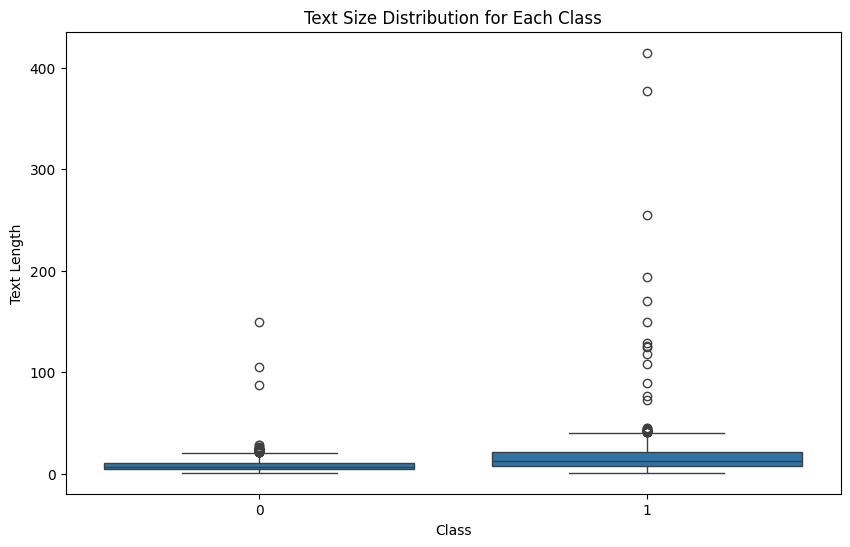

In [4]:
# visualize the size of text for each classes
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='hate_speech', y='text_length', data=df)
plt.title('Text Size Distribution for Each Class')
plt.xlabel('Class')
plt.ylabel('Text Length')
plt.show()

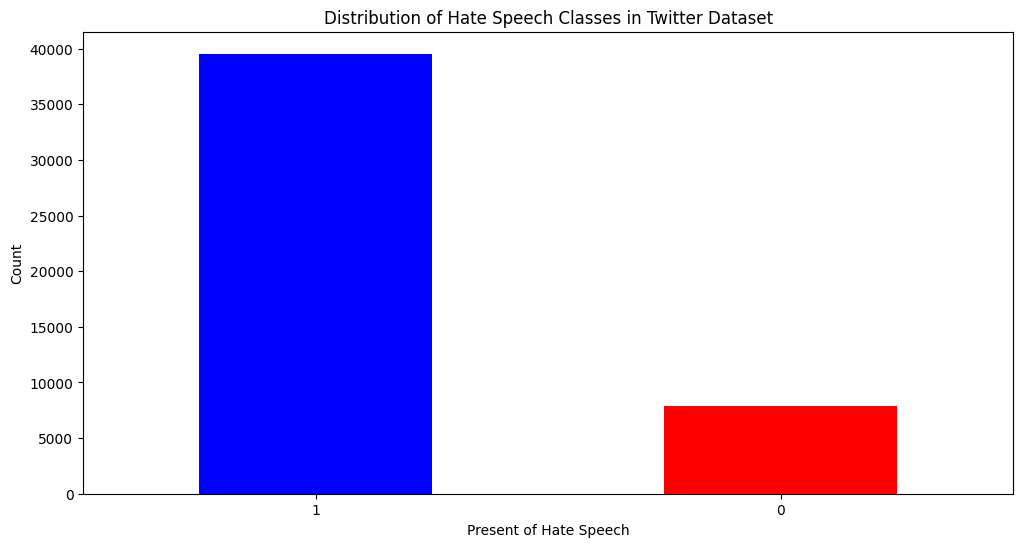

Total number of text that label as non hate = 7847
Total number of text that label as hate = 39538
Total unique value in column 'hate_speech': 
hate_speech
1    39538
0     7847
Name: count, dtype: int64


In [5]:
# visualize dataset
df100 = df[df['text_length'] <= 100].copy()

plt.figure(figsize=(12, 6))
count = df100['hate_speech'].value_counts()
count.plot(kind='bar',color=['blue', 'red'])
plt.title('Distribution of Hate Speech Classes in Twitter Dataset')
plt.xlabel('Present of Hate Speech')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# check and display the total number of occurrences of '0' in 'target'
count_nonhate = df100['hate_speech'].value_counts().get(0, 0)
print(f'Total number of text that label as non hate = {count_nonhate}')

count_hate = df100['hate_speech'].value_counts().get(1, 0)
print(f'Total number of text that label as hate = {count_hate}')

print('Total unique value in column \'hate_speech\': ')
print(df100['hate_speech'].value_counts())

# Train Validation Test Split

In [6]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

X = df100['clean_text'].values
y = df100['hate_speech'].values

# split X and y into train test validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=77)

print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('type of X_train: ', type(X_train))
print('type of y_train: ', type(y_train))


# instantiate the RandomOverSampler
undersampler = RandomOverSampler(random_state=66)
X_train, y_train = undersampler.fit_resample(X_train.reshape(-1,1), y_train)
X_train = X_train.flatten()
#y_train = pd.Series(y_train_resampled)

print('\n\ntype of X_train: ', type(X_train))
print('type of y_train: ', type(y_train))

# convert target to array
#y_train = np.asarray(y_train).astype('float32')

# printing shape
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)

# printing shape
print('Shape of X val:', X_val.shape)
print('Shape of y val:', y_val.shape)

# printing shape
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (37908,)
Shape of y train: (37908,)
type of X_train:  <class 'numpy.ndarray'>
type of y_train:  <class 'numpy.ndarray'>


type of X_train:  <class 'numpy.ndarray'>
type of y_train:  <class 'numpy.ndarray'>
Shape of X train: (63198,)
Shape of y train: (63198,)
Shape of X val: (4739,)
Shape of y val: (4739,)
Shape of X test: (4738,)
Shape of y test: (4738,)


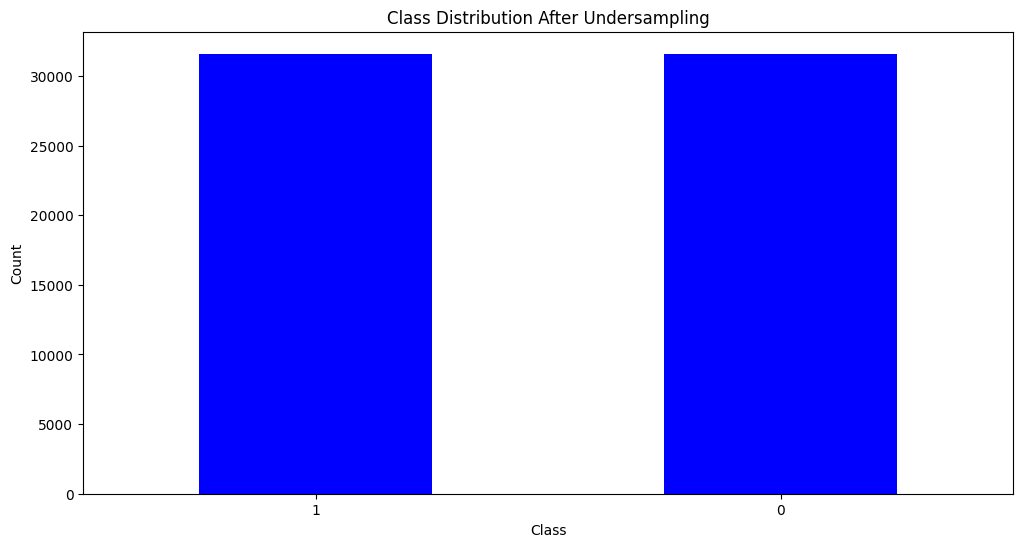

Total number of text that label as non hate = 31599
Total number of text that label as hate = 31599
Total unique value in column 'hate_speech': 
hate_speech
1    31599
0    31599
Name: count, dtype: int64


In [7]:
# Create a DataFrame to display the class distribution
new_df = pd.DataFrame({'hate_speech': y_train})
class_counts = new_df['hate_speech'].value_counts()

# Plot a bar graph
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar', color='blue')
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

count_nonhate = new_df['hate_speech'].value_counts().get(0, 0)
print(f'Total number of text that label as non hate = {count_nonhate}')

count_hate = new_df['hate_speech'].value_counts().get(1, 0)
print(f'Total number of text that label as hate = {count_hate}')

print('Total unique value in column \'hate_speech\': ')
print(new_df['hate_speech'].value_counts())

# Subword Tokenization

In [8]:
import torch

def bert_tokenizer(data):
    input_ids = []
    attention_masks = []
    for sent in data:
        encoded_sent = tokenizer.encode_plus(
            text=sent,
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]` special tokens
            max_length=max_len,             # Choose max length to truncate/pad
            padding='max_length',         # Pad sentence to max length 
            return_attention_mask=True      # Return attention mask
            )
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [9]:
import tokenizers
from transformers import AutoTokenizer, BertTokenizer

tokenizer = AutoTokenizer.from_pretrained('distilbert/distilbert-base-uncased')

# Tokenize train tweets
encoded_tweets = [tokenizer.encode(sent, add_special_tokens=True) for sent in X]

# Find the longest tokenized tweet
max_len = max([len(sent) for sent in encoded_tweets])
print('Max length: ', max_len)

Max length:  141


In [10]:
train_inputs, train_masks = bert_tokenizer(X_train)
val_inputs, val_masks = bert_tokenizer(X_val)
test_inputs, test_masks = bert_tokenizer(X_test)

In [11]:
train_inputs[1]

tensor([ 101, 2428, 2215, 2681, 3016, 2181, 1012, 2178, 8688, 2442, 2081, 1012,
        3335, 4545, 2172, 1012,  102,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0])

In [12]:
train_masks[1]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
# Convert target columns to pytorch tensors format
train_labels = torch.from_numpy(y_train)
val_labels = torch.from_numpy(y_val)
test_labels = torch.from_numpy(y_test)

In [14]:
train_labels

tensor([1, 1, 1,  ..., 0, 0, 0])

In [15]:
# printing shape
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)

# printing shape
print('Shape of X val:', X_val.shape)
print('Shape of y val:', y_val.shape)

# printing shape
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (63198,)
Shape of y train: (63198,)
Shape of X val: (4739,)
Shape of y val: (4739,)
Shape of X test: (4738,)
Shape of y test: (4738,)


# Data Loader

In [16]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
print(type(train_data))
# Assuming train_labels is a tensor
unique_values, counts = torch.unique(train_labels, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Label: {value}, Count: {count}")
#train_sampler = RandomSampler(train_data)
#train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
#val_sampler = SequentialSampler(val_data)
#val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Create the DataLoader for our test set
test_data = TensorDataset(test_inputs, test_masks, test_labels)
#test_sampler = SequentialSampler(test_data)
#test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

<class 'torch.utils.data.dataset.TensorDataset'>
Label: 0, Count: 31599
Label: 1, Count: 31599


# Training Model

In [17]:
from transformers import AutoModelForSequenceClassification
import os

os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device
model = AutoModelForSequenceClassification.from_pretrained('distilbert/distilbert-base-uncased', num_labels=2)
model.to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [18]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="distill-bert-uncased oversampled",
                                  overwrite_output_dir=True,
                                  num_train_epochs=20,
                                  evaluation_strategy='epoch',
                                  save_strategy='epoch',
                                  load_best_model_at_end=True,
                                  save_total_limit = 10,
                                  per_device_train_batch_size=32,
                                  learning_rate=1e-5,
                                  metric_for_best_model="eval_f1",)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    
    # Calculate accuracy
    accuracy = accuracy_score(labels, preds)

   # Calculate precision, recall, and F1-score
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    f1 = f1_score(labels, preds, average='weighted')
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [20]:
def custom_data_collator(features):
    batch = {}
    batch['input_ids'] = torch.stack([f[0] for f in features])
    batch['attention_mask'] = torch.stack([f[1] for f in features])
    batch['labels'] = torch.stack([f[2] for f in features])

    return batch

In [21]:
from transformers import Trainer
from transformers import EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    data_collator=custom_data_collator,  # Use the data collator
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(3, 0.001)]
)

In [22]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.262300,0.312697,0.839629,0.889938,0.839629,0.854171
2,0.195400,0.435397,0.852712,0.873070,0.852712,0.860322
3,0.162400,0.642761,0.851445,0.867347,0.851445,0.857762
4,0.124200,0.735775,0.856088,0.863797,0.856088,0.859482
5,0.102800,0.844560,0.853345,0.867423,0.853345,0.859041


TrainOutput(global_step=19750, training_loss=0.1807152923390835, metrics={'train_runtime': 13834.6796, 'train_samples_per_second': 91.362, 'train_steps_per_second': 5.71, 'total_flos': 1.152740358493092e+16, 'train_loss': 0.1807152923390835, 'epoch': 5.0})

(4738,)
(4738,)


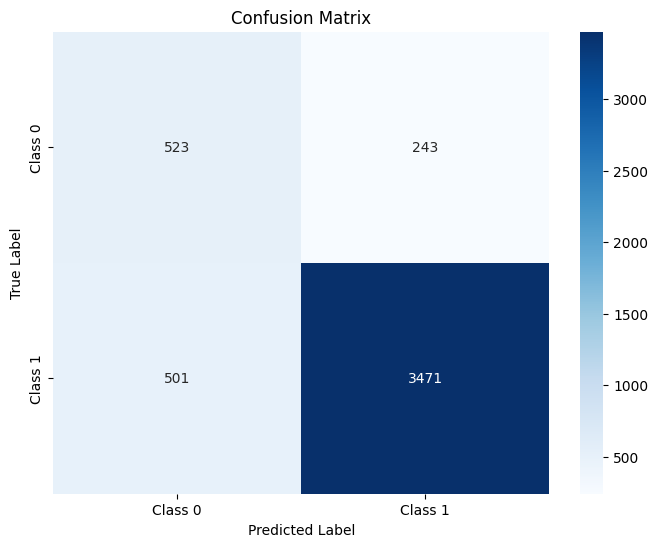

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test dataset
predictions = trainer.predict(test_data)

# Extract predicted labels from predictions
predicted_labels = np.argmax(predictions.predictions, axis=1)
print(predicted_labels.shape)

# Extract true labels from the test dataset
true_labels = predictions.label_ids
print(true_labels.shape)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [24]:
def model_init(trial):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)
    model = AutoModelForSequenceClassification.from_pretrained('distilbert/distilbert-base-uncased', num_labels=2)
    model.to(device)
    return model

In [25]:
tuner = Trainer(
    model=None,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    data_collator=custom_data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(3, 0.001)],
    model_init=model_init,
)

cuda


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
import optuna
from optuna.samplers import GridSampler

def optuna_hp_space(trial):
    return {
       "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-4, log=True),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [16, 32, 64])
    }

In [27]:
def train_objective(metrics):
    f1 = list(metrics.values())[4]
    return f1

In [28]:
best_trials = tuner.hyperparameter_search(
    direction="maximize",
    backend="optuna",
    hp_space=optuna_hp_space,
    n_trials=4,
    compute_objective=train_objective,
)

[I 2024-04-17 22:27:39,994] A new study created in memory with name: no-name-9f23060b-f659-4cb8-84e6-e1f49f86f27b


cuda


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.306200,0.518093,0.831399,0.890443,0.831399,0.847852
2,0.246700,0.549745,0.856932,0.872077,0.856932,0.862906
3,0.204500,0.756371,0.848491,0.863707,0.848491,0.854642
4,0.167300,0.704896,0.854189,0.857052,0.854189,0.855553
5,0.156700,0.849485,0.851445,0.848550,0.851445,0.849925


[I 2024-04-18 02:49:26,951] Trial 0 finished with value: 0.8499253147172486 and parameters: {'learning_rate': 4.78833700898469e-05, 'per_device_train_batch_size': 8}. Best is trial 0 with value: 0.8499253147172486.


cuda


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.313600,0.530002,0.828867,0.893701,0.828867,0.846298
2,0.274900,0.467673,0.848491,0.872432,0.848491,0.857199
3,0.206500,0.730583,0.850601,0.866925,0.850601,0.857067
4,0.174600,0.676579,0.851234,0.866346,0.851234,0.857303
5,0.152500,0.789278,0.857143,0.858877,0.857143,0.857984


[I 2024-04-18 07:36:49,028] Trial 1 finished with value: 0.8579835988527625 and parameters: {'learning_rate': 4.836521096824837e-05, 'per_device_train_batch_size': 8}. Best is trial 1 with value: 0.8579835988527625.


cuda


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.265300,0.422215,0.861574,0.879907,0.861574,0.868382
2,0.198200,0.660645,0.864317,0.863824,0.864317,0.864068
3,0.133000,0.657096,0.859886,0.865356,0.859886,0.862366
4,0.113800,0.808207,0.862207,0.868618,0.862207,0.865056


[I 2024-04-18 11:37:17,578] Trial 2 finished with value: 0.8650560719005708 and parameters: {'learning_rate': 1.7528819822401855e-05, 'per_device_train_batch_size': 8}. Best is trial 2 with value: 0.8650560719005708.


cuda


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.262100,0.358837,0.845959,0.887383,0.845959,0.858595
2,0.163000,0.408825,0.857776,0.864438,0.857776,0.860749
3,0.118800,0.557713,0.854822,0.861600,0.854822,0.857856
4,0.087600,0.630432,0.862629,0.862989,0.862629,0.862808
5,0.076700,0.741793,0.848913,0.865182,0.848913,0.855395
6,0.074100,0.714706,0.868116,0.864865,0.868116,0.866359
7,0.065200,0.727013,0.851867,0.853900,0.851867,0.852851
8,0.061900,0.832739,0.861152,0.865956,0.861152,0.863351
9,0.053500,0.940414,0.862207,0.857331,0.862207,0.859497


[I 2024-04-18 18:20:26,190] Trial 3 finished with value: 0.8594974187080477 and parameters: {'learning_rate': 4.1432303050859566e-05, 'per_device_train_batch_size': 32}. Best is trial 2 with value: 0.8650560719005708.


# Figures

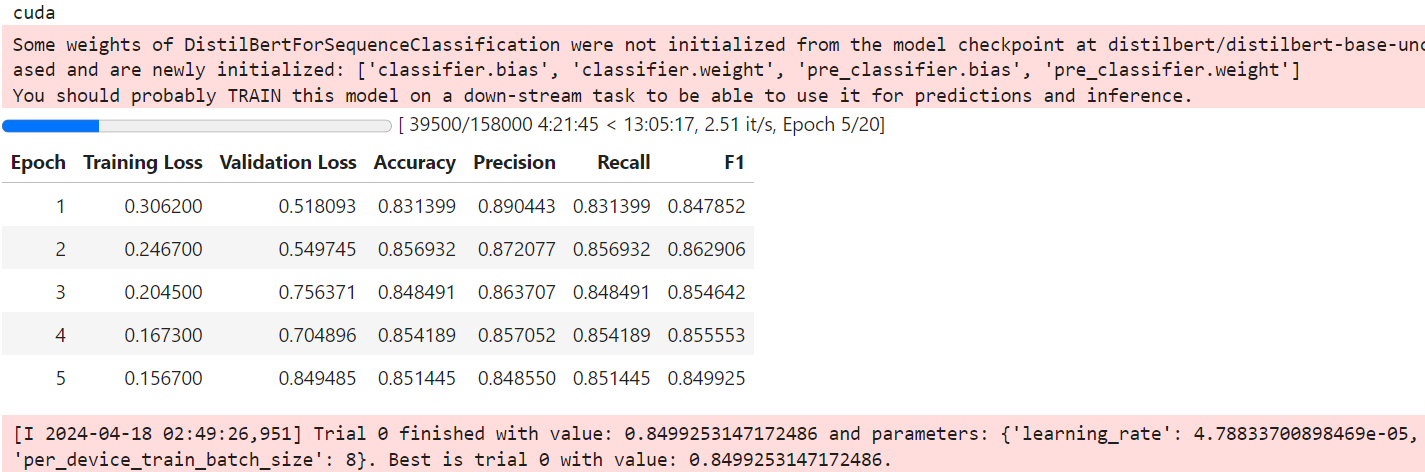

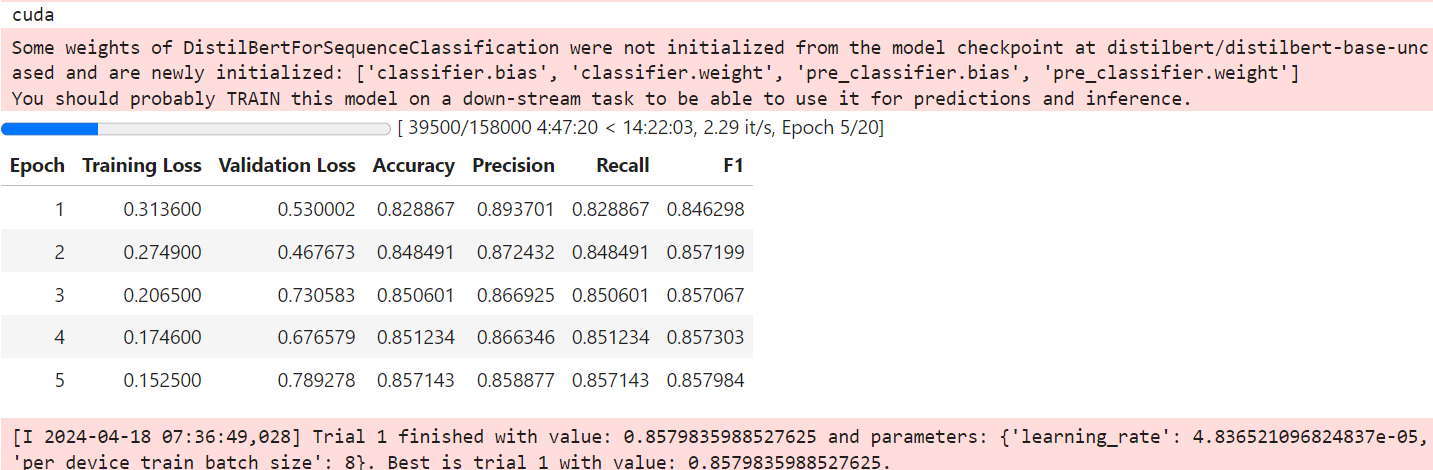

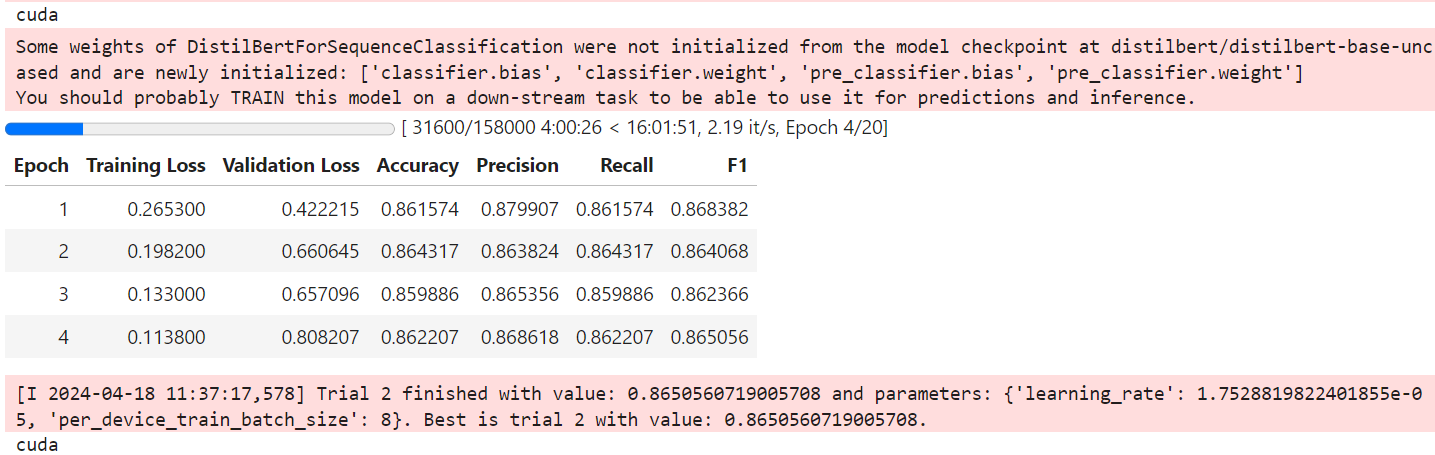

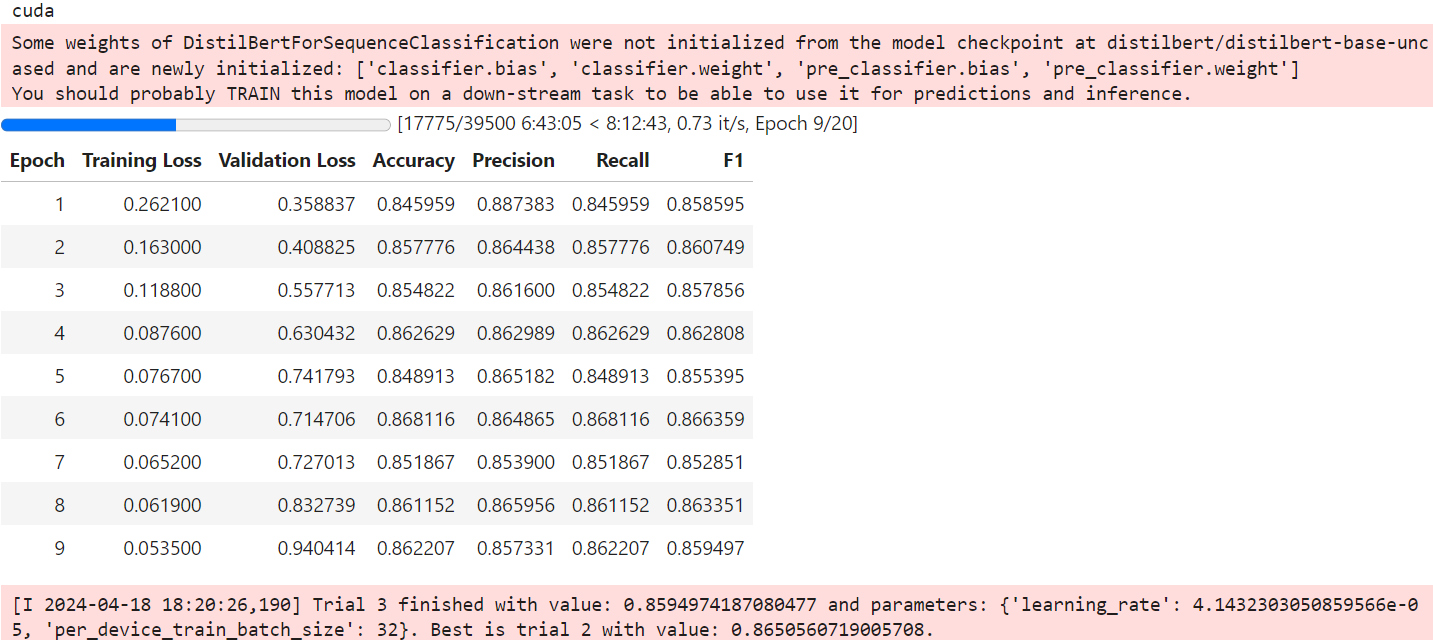

In [22]:
best_model = AutoModelForSequenceClassification.from_pretrained('distilbert/distilbert-base-uncased', num_labels=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
best_model.to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


cuda


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

# Train Hypertuned model

In [23]:
best_trainer = Trainer(
    model=best_model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    data_collator=custom_data_collator,  # Use the data collator
    compute_metrics=compute_metrics
)

In [24]:
training_args = best_trainer.args

# Set the configuration parameters
training_args.output_dir="distill-bert-uncased oversampled tuned"
training_args.per_device_train_batch_size = 32
training_args.learning_rate = 4.1432303050859566e-5
training_args.num_train_epochs = 8
training_args.num_train_epochs

8

In [25]:
best_trainer.args.learning_rate

4.1432303050859566e-05

In [26]:
best_trainer.args.output_dir

'distill-bert-uncased oversampled tuned'

In [27]:
best_trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.267300,0.337856,0.843638,0.881003,0.843638,0.855637
2,0.161900,0.446675,0.866428,0.866637,0.866428,0.866532
3,0.109300,0.556504,0.860730,0.863702,0.860730,0.862136
4,0.083200,0.694335,0.860097,0.865167,0.860097,0.862411
5,0.063300,0.732647,0.865794,0.865794,0.865794,0.865794
6,0.060200,0.881288,0.858409,0.862278,0.858409,0.860215
7,0.054800,1.049924,0.860519,0.857332,0.860519,0.858819
8,0.050900,1.083060,0.860730,0.857342,0.860730,0.858915


TrainOutput(global_step=15800, training_loss=0.10939942637576333, metrics={'train_runtime': 22300.9704, 'train_samples_per_second': 22.671, 'train_steps_per_second': 0.708, 'total_flos': 1.844384573588947e+16, 'train_loss': 0.10939942637576333, 'epoch': 8.0})

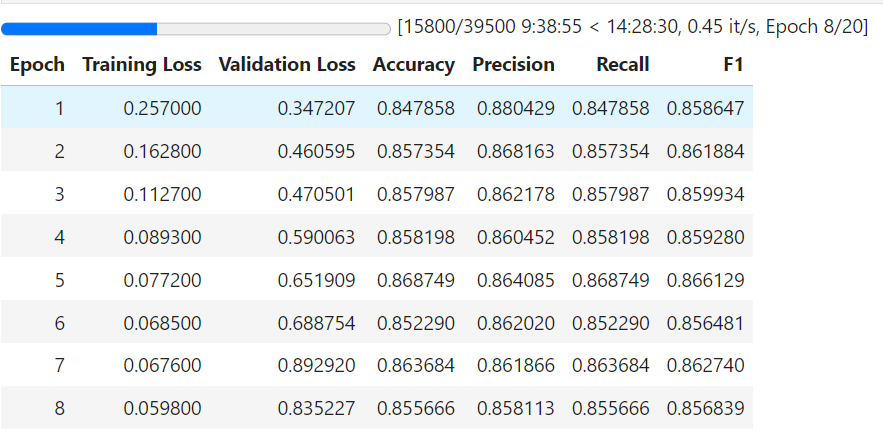

In [28]:
best_trainer.evaluate(test_data)

{'eval_loss': 0.49201518297195435,
 'eval_accuracy': 0.8512030392570705,
 'eval_precision': 0.8515958348519658,
 'eval_recall': 0.8512030392570705,
 'eval_f1': 0.851398207912267,
 'eval_runtime': 81.8491,
 'eval_samples_per_second': 57.887,
 'eval_steps_per_second': 7.245,
 'epoch': 8.0}

In [29]:
# Make predictions on the test dataset
predictions = best_trainer.predict(test_data)

(4738,)


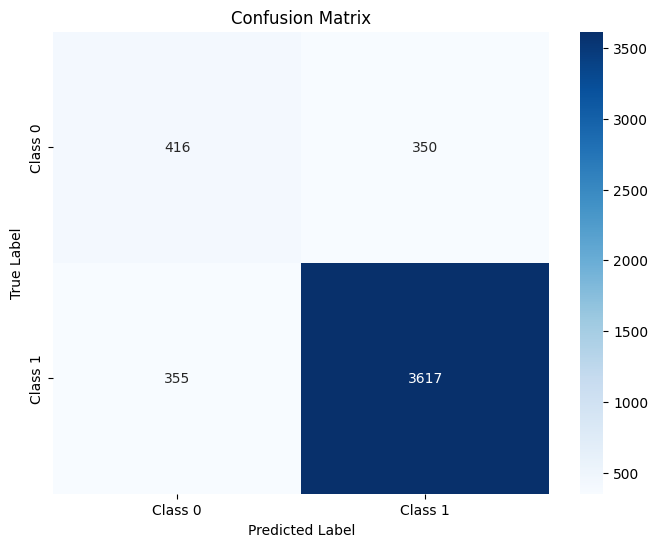

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Extract predicted labels from predictions
predicted_labels = np.argmax(predictions.predictions, axis=1)
print(predicted_labels.shape)

# Extract true labels from the test dataset
true_labels = predictions.label_ids

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [31]:
best_trainer.save_model("transformerModels/DistilBERT Oversampled")